# Geoquoteerde eindoefening

## Max Valkenburg & Emile Knaepen

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

## 1. (S)Arima model

In [2]:
#datetime parsen
def parser(x):
    return datetime.strptime(x, '%d/%m/%Y %H:%M')

In [3]:
#read data
SolarData = pd.read_excel('SolarForecast.xls', parse_dates=[0], index_col='DateTime', date_parser=parser)

In [4]:
SolarData.head()

,Most recent forecast [MW],Day-Ahead forecast [MW],Week-Ahead forecast [MW],Real-time Upscaled Measurement [MW],Corrected Upscaled Measurement [MW],Monitored Capacity [MWp],Day-Ahead forecast (11h00) [MW]
DateTime,,,,,,,
2020-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 00:15:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 00:30:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 00:45:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 01:00:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0


In [5]:
SolarData.describe()

,Most recent forecast [MW],Day-Ahead forecast [MW],Week-Ahead forecast [MW],Real-time Upscaled Measurement [MW],Corrected Upscaled Measurement [MW],Monitored Capacity [MWp],Day-Ahead forecast (11h00) [MW]
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.00,2880.000000
mean,182.063976,184.772465,172.949524,181.968361,174.375819,4037.14,186.468549
std,341.131936,347.318288,308.062869,349.078161,345.762503,0.00,347.514519
min,0.000000,0.000000,0.000000,0.000000,0.000000,4037.14,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4037.14,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4037.14,0.000000
75%,227.157500,220.230000,262.690000,220.555000,187.170000,4037.14,230.605000
max,1580.210000,1606.320000,1420.990000,1800.640000,1748.420000,4037.14,1575.510000


In [6]:
#juiste data selecteren
SolarData = SolarData.rename({"Corrected Upscaled Measurement [MW]" : "Measurement"}, axis = 'columns')
Data = SolarData.drop(columns=['Most recent forecast [MW]','Day-Ahead forecast [MW]', 'Week-Ahead forecast [MW]',
                     'Real-time Upscaled Measurement [MW]', 'Monitored Capacity [MWp]', 'Day-Ahead forecast (11h00) [MW]'])
Data.head()

,Measurement
DateTime,
2020-11-01 00:00:00,0.0
2020-11-01 00:15:00,0.0
2020-11-01 00:30:00,0.0
2020-11-01 00:45:00,0.0
2020-11-01 01:00:00,0.0


<AxesSubplot:xlabel='DateTime'>

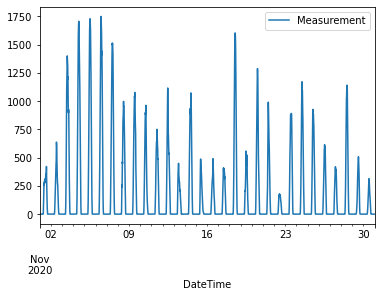

In [7]:
Data.plot()

In [8]:
#tijd elke 15min instellen
Data.index = Data.index.to_period('15T')

In [9]:
#fit and make model
model = ARIMA(Data, order= (1,1,1))

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Measurement   No. Observations:                 2880
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12652.426
Date:                Fri, 25 Dec 2020   AIC                          25310.852
Time:                        17:18:47   BIC                          25328.748
Sample:                    11-01-2020   HQIC                         25317.302
                         - 11-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9147      0.005    177.994      0.000       0.905       0.925
ma.L1         -0.1826      0.009    -19.523      0.000      -0.201      -0.164
sigma2       384.4022      3.522    109.154      0.000     377.500     391.305
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):             38885.36
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecast predicitions maken

<AxesSubplot:xlabel='DateTime'>

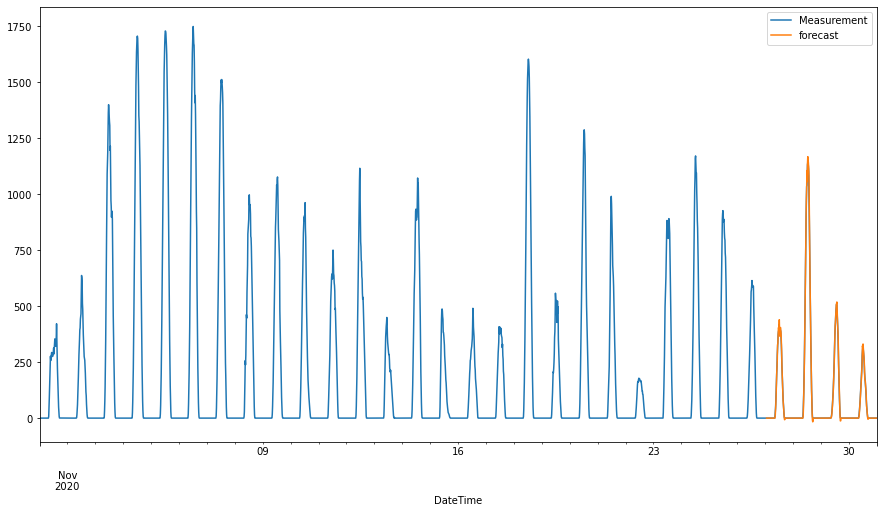

In [10]:
#forecast predicten
Data['forecast']=model_fit.predict(start=2500, end=2881, dynamic=False)
Data[['Measurement', 'forecast']].plot(figsize=(15,8))

<AxesSubplot:xlabel='DateTime'>

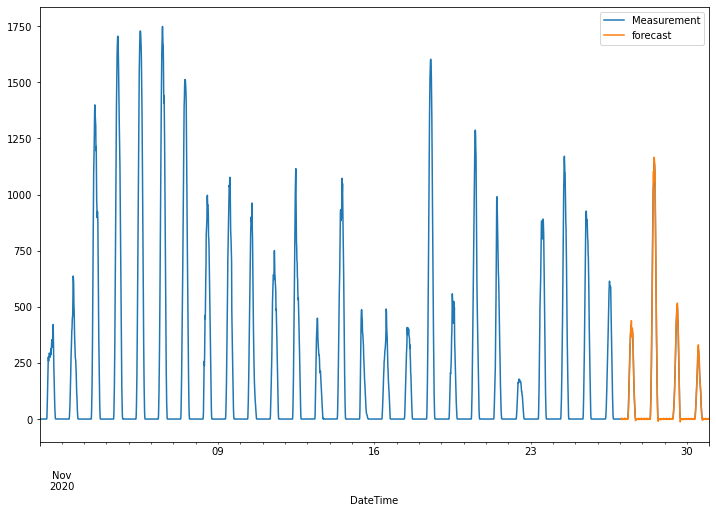

In [11]:
Data.dropna()
model_2 = sm.tsa.statespace.SARIMAX(Data['Measurement'], order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model_2.fit()
Data['forecast']=results.predict(start=2500, end=2881, dynamic=False)
Data[['Measurement', 'forecast']].plot(figsize=(12,8))

# 2. LTSM model